<a href="https://colab.research.google.com/github/Gonzalounab/unab/blob/main/Copia_de_Untitled22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
tesla_ticker=yf.Ticker("TSLA")
tesla_data=tesla_ticker.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [ ]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
soup = BeautifulSoup(html_data, 'html.parser')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all("table")
revenue_table = tables[1]
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

        tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
        tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


In [ ]:
gme_ticker=yf.Ticker("GME")
gme_data=gme_ticker.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [ ]:
url= " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text
soup = BeautifulSoup(html_data, 'html.parser')
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all("table")
revenue_table = tables[1]
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
        gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail()

,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


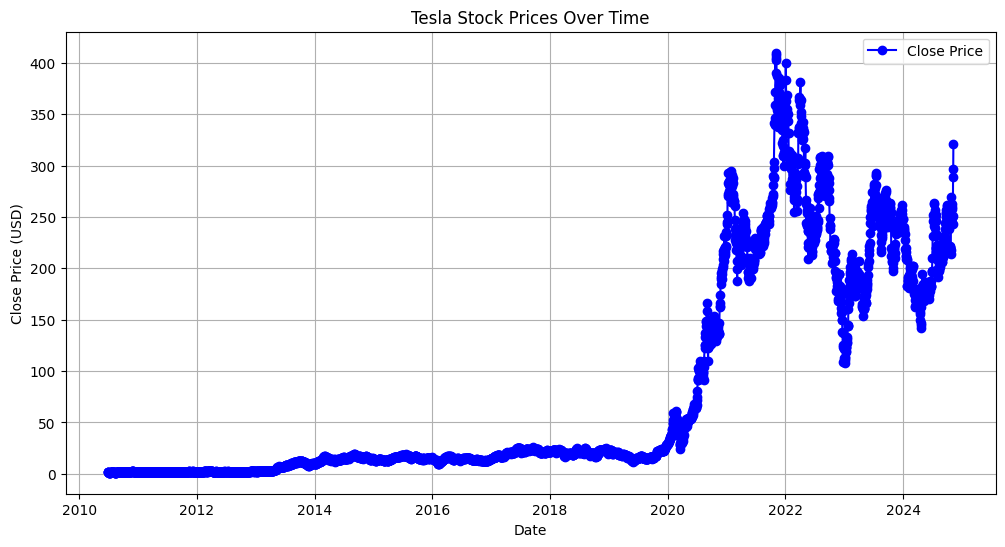

In [1]:
# Importar las librerías necesarias
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar los datos históricos de Tesla
tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="max")

# Resetear el índice para usar la columna de fechas
tesla_data.reset_index(inplace=True)

# Crear el gráfico de precios de cierre de Tesla
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Date'], tesla_data['Close'], color='blue', marker='o', linestyle='-', label='Close Price')
plt.title("Tesla Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


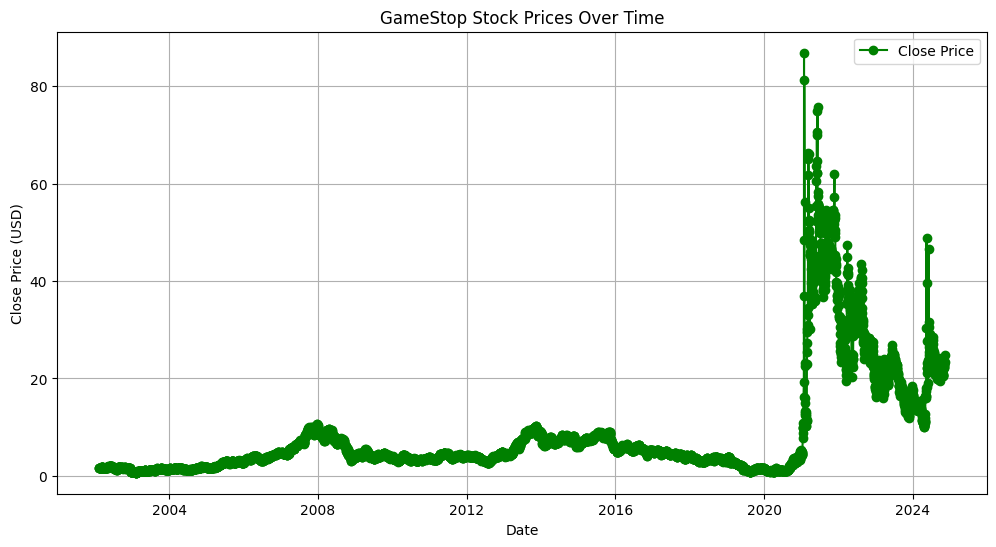

In [2]:
# Importar las librerías necesarias
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar los datos históricos de GameStop
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")

# Resetear el índice para usar la columna de fechas
gme_data.reset_index(inplace=True)

# Crear el gráfico de precios de cierre de GameStop
plt.figure(figsize=(12, 6))
plt.plot(gme_data['Date'], gme_data['Close'], color='green', marker='o', linestyle='-', label='Close Price')
plt.title("GameStop Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.legend()
plt.show()
